<a href="https://colab.research.google.com/github/ganesh1606/ML_model/blob/main/classfication_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing packages
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Reading dataset
df = pd.read_csv('/content/drive/MyDrive/ML/Defective_Product_Detection.csv')
df.head()

,Product_ID,Product_Type,Production_Line,Batch_Number,Manufacturing_Date,Defective,Weight,Temperature,Quality_Check_Score,Customer_Rating
0,59a89f63-19a7-4f5c-b3b3-ee1f703bf321,Clothing,Line_2,3815,2022-06-14,1,9.436330,62.277877,66.524691,3.435307
1,f5ce7bd1-b678-4027-ad30-566d0d27bd5c,Clothing,Line_3,4902,2022-02-21,1,1.637061,67.294881,16.880499,4.966900
2,72cb6aa8-f58a-4cb7-98bf-3ffbe048a983,Clothing,Line_1,5347,2022-09-01,0,2.419373,59.010185,32.594249,2.482423
3,c38a5333-6d1b-4f95-abf9-96b014d0a0a3,Furniture,Line_2,1132,2022-11-07,0,6.965553,30.050219,43.993686,NaN
4,248648a5-dcae-4035-8e24-22ec73aa0e5c,Electronics,Line_1,5224,2022-10-15,1,8.480020,NaN,27.263207,2.891426


In [7]:
# See the no. of rows and columns
df.shape

(940, 10)

In [8]:
#printing all columns
data_cols = df.columns.tolist()
print(data_cols)

['Product_ID', 'Product_Type', 'Production_Line', 'Batch_Number', 'Manufacturing_Date', 'Defective', 'Weight', 'Temperature', 'Quality_Check_Score', 'Customer_Rating']


In [9]:
# Display data type of each feature
df.dtypes

,0
Product_ID,object
Product_Type,object
Production_Line,object
Batch_Number,int64
Manufacturing_Date,object
Defective,int64
Weight,float64
Temperature,float64
Quality_Check_Score,float64
Customer_Rating,float64


In [10]:
df.describe()

,Batch_Number,Defective,Weight,Temperature,Quality_Check_Score,Customer_Rating
count,940.000000,940.000000,879.000000,877.000000,940.000000,887.000000
mean,5485.500000,0.530851,5.535421,49.830308,49.585296,3.023951
std,2633.306243,0.499313,2.547262,17.440022,28.890098,1.159408
min,1002.000000,0.000000,1.030449,20.007635,0.032983,1.000432
25%,3177.250000,0.000000,3.367804,35.196942,23.685349,2.033796
50%,5358.500000,1.000000,5.491803,50.018042,50.371016,3.030886
75%,7947.250000,1.000000,7.494210,64.418390,74.138363,4.041347
max,9992.000000,1.000000,9.998874,79.987445,99.867799,4.997230


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_ID           940 non-null    object 
 1   Product_Type         940 non-null    object 
 2   Production_Line      940 non-null    object 
 3   Batch_Number         940 non-null    int64  
 4   Manufacturing_Date   940 non-null    object 
 5   Defective            940 non-null    int64  
 6   Weight               879 non-null    float64
 7   Temperature          877 non-null    float64
 8   Quality_Check_Score  940 non-null    float64
 9   Customer_Rating      887 non-null    float64
dtypes: float64(4), int64(2), object(4)
memory usage: 73.6+ KB


In [12]:
# find the null values
df.isnull().sum()

,0
Product_ID,0
Product_Type,0
Production_Line,0
Batch_Number,0
Manufacturing_Date,0
Defective,0
Weight,61
Temperature,63
Quality_Check_Score,0
Customer_Rating,53


In [13]:
# Remove unwanted columns
df.drop(columns=['Product_ID'], inplace=True)  # specify the columns to remove

In [14]:
# Fill numerical columns with mean and categorical columns with the mode
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['object']).columns
cat_columns

Index(['Product_Type', 'Production_Line', 'Manufacturing_Date'], dtype='object')

In [15]:
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())  # numerical columns
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])  # categorical columns

In [ ]:
# fill the missing values for numerical terms - mean
#df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [ ]:
# fill the missing values for categorical terms - mode
#df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])

In [16]:
# find the null values
df.isnull().sum()


,0
Product_Type,0
Production_Line,0
Batch_Number,0
Manufacturing_Date,0
Defective,0
Weight,0
Temperature,0
Quality_Check_Score,0
Customer_Rating,0


In [17]:
df.head()

,Product_Type,Production_Line,Batch_Number,Manufacturing_Date,Defective,Weight,Temperature,Quality_Check_Score,Customer_Rating
0,Clothing,Line_2,3815,2022-06-14,1,9.436330,62.277877,66.524691,3.435307
1,Clothing,Line_3,4902,2022-02-21,1,1.637061,67.294881,16.880499,4.966900
2,Clothing,Line_1,5347,2022-09-01,0,2.419373,59.010185,32.594249,2.482423
3,Furniture,Line_2,1132,2022-11-07,0,6.965553,30.050219,43.993686,3.023951
4,Electronics,Line_1,5224,2022-10-15,1,8.480020,49.830308,27.263207,2.891426


In [18]:
# Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [19]:
# Scale numerical features with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

In [20]:
df.head()

,Product_Type,Production_Line,Batch_Number,Manufacturing_Date,Defective,Weight,Temperature,Quality_Check_Score,Customer_Rating
0,0,1,0.312903,151,1.0,0.937275,0.704741,0.666017,0.609206
1,0,2,0.433815,46,1.0,0.067639,0.788386,0.168754,0.992411
2,0,0,0.483315,224,0.0,0.154868,0.650261,0.326151,0.370794
3,3,1,0.014461,285,0.0,0.661778,0.167433,0.440334,0.506285
4,1,0,0.469633,264,1.0,0.830644,0.497212,0.272753,0.473127


In [21]:
# Split data into train and test sets
# replace 'target_column' with your target column name
X = df.drop('Defective', axis=1)  # -- independent variable
y = df['Defective'] # -- dependent variable

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
# Evaluate Logistic Regression model
from sklearn.metrics import accuracy_score, confusion_matrix
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)

In [60]:
print("Logistic Regression Accuracy:", logreg_accuracy*100)
print("Logistic Regression Confusion Matrix:\n", logreg_conf_matrix)

Logistic Regression Accuracy: 54.78723404255319
Logistic Regression Confusion Matrix:
 [[18 67]
 [18 85]]


In [62]:
#Train Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
# Evaluate Random Forest Classifier model
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

In [64]:
print("Random Forest Accuracy:", rf_accuracy*100)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)

Random Forest Accuracy: 51.59574468085106
Random Forest Confusion Matrix:
 [[40 45]
 [46 57]]


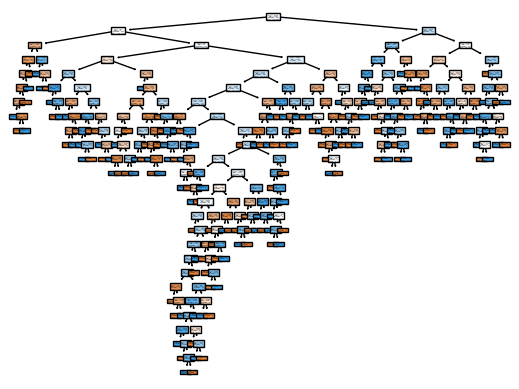

In [65]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [66]:
# Select the best model
best_model = logreg_model if logreg_accuracy > rf_accuracy else rf_model

In [67]:
# Save the best model as a .pkl file
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'
